# Parameters experience
## Done by varying the parameters of the detector


### Importing modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib.util
import sys
import os
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib.collections import PathCollection

from matplotlib.patches import Rectangle
from matplotlib.patches import ConnectionPatch

from scipy.optimize import curve_fit

module_name = "utils_v2"
file_path = "/workspaces/TP3/utils_v2.py"

spec = importlib.util.spec_from_file_location(module_name, file_path)
module = importlib.util.module_from_spec(spec)
sys.modules[module_name] = module
spec.loader.exec_module(module)

# Importer le module
import utils_v2 as u

import pandas as pd

## Varying the bin width

### Import the datas

In [3]:
bins = np.array([100,300,500,700,900,1100,1300,1500,1700,1900,2100,2300,2500])

#datas will contain in the first sublist the degrees, in the second the delays and in the third the counts

datas = [[],[],[]]
for bin in bins :
    data = pd.read_csv("/workspaces/TP3/TP_Intrication-Quantique/Datas/Parameters/spectrum_bin_{}ps.csv".format(bin), sep=";",header=0)
    
    delays = np.concatenate([-data.iloc[:,0].to_numpy()[::-1],data.iloc[:,0].to_numpy()]) 
    counts = np.concatenate([data.iloc[:,1].to_numpy()[::-1],data.iloc[:,2].to_numpy()])
    
    datas[0].append(bin)
    datas[1].append(delays)
    datas[2].append(counts)
    


### Process an plot the data

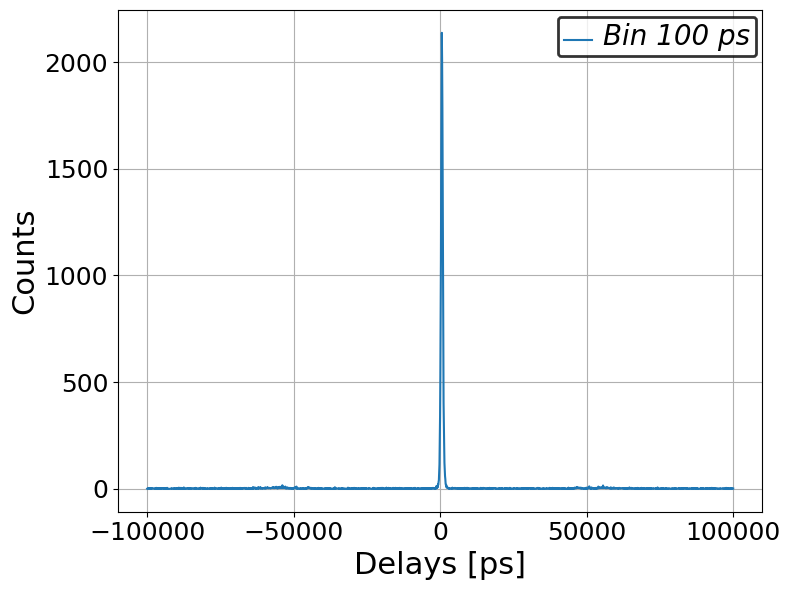

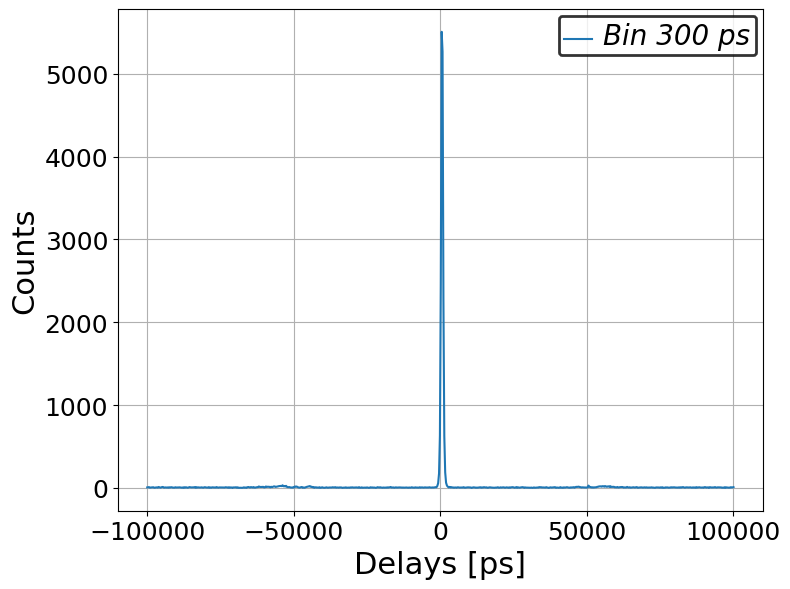

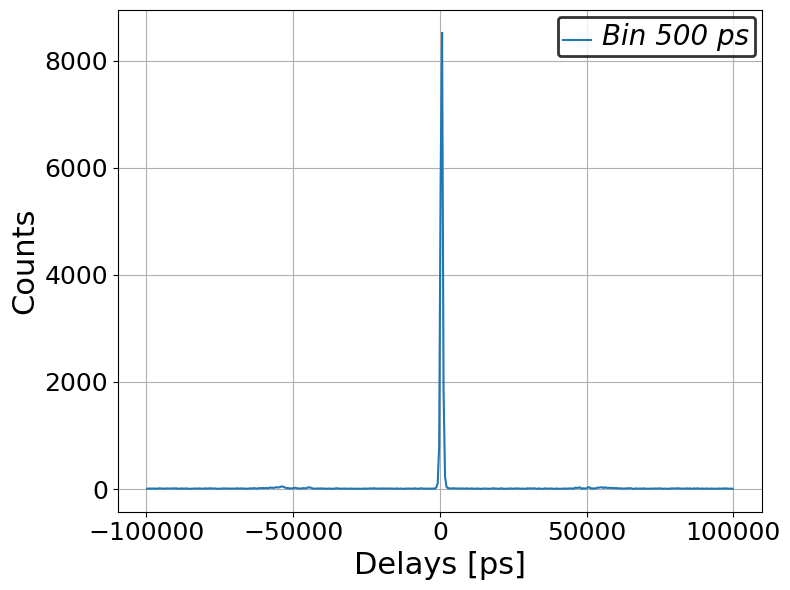

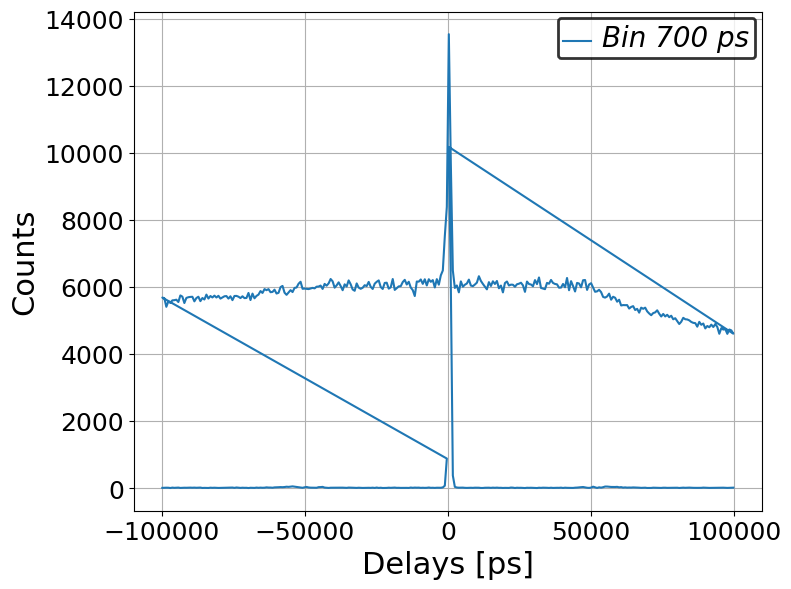

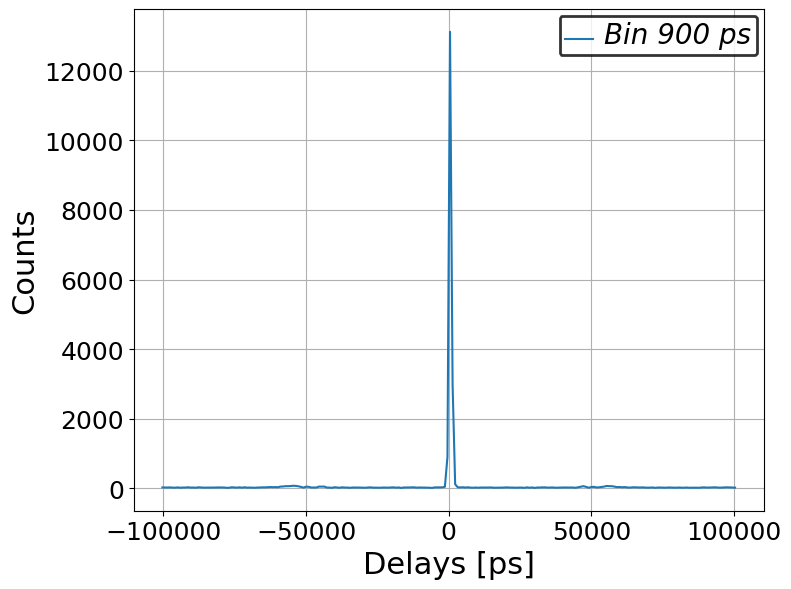

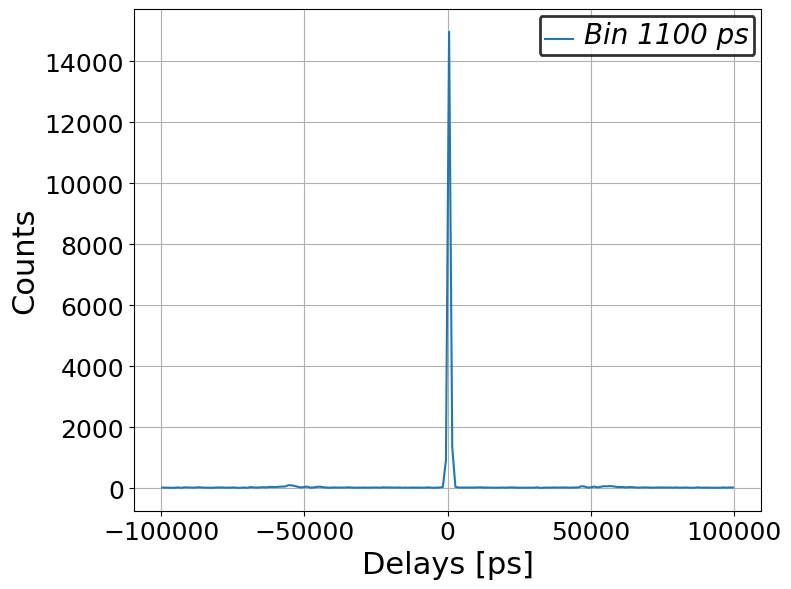

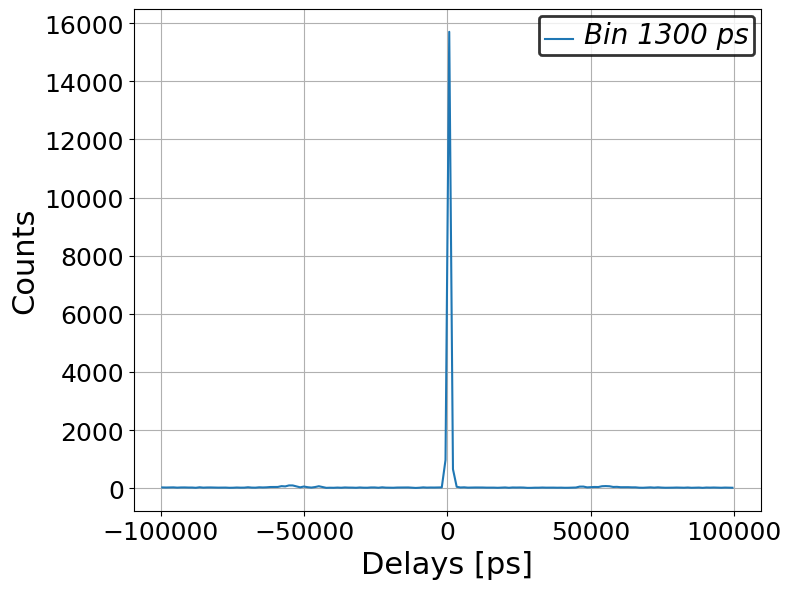

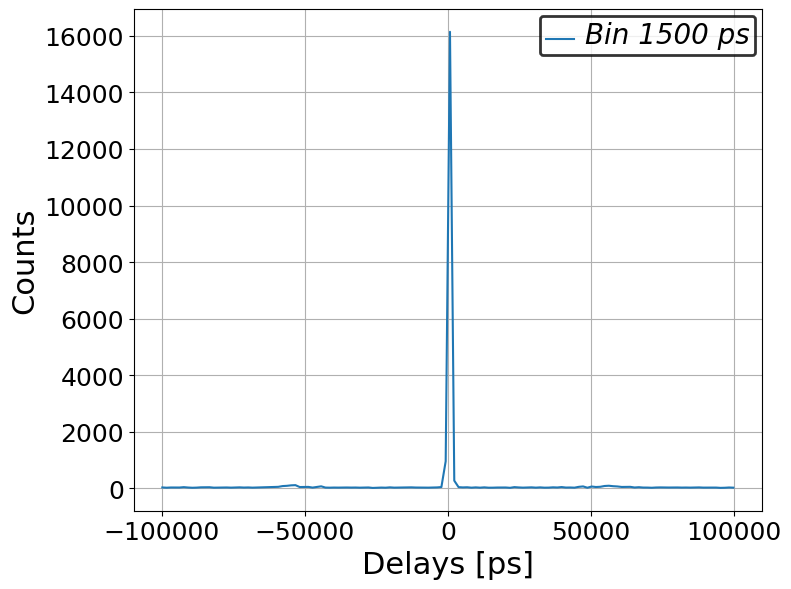

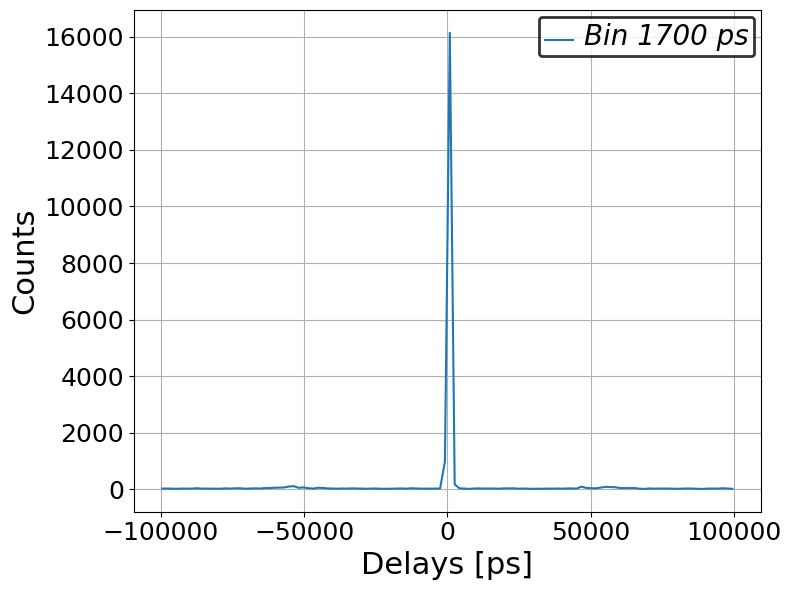

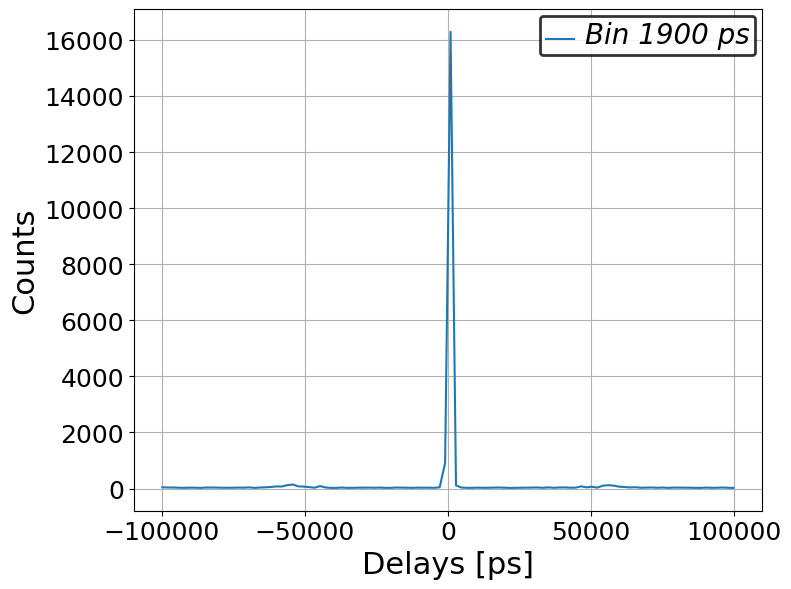

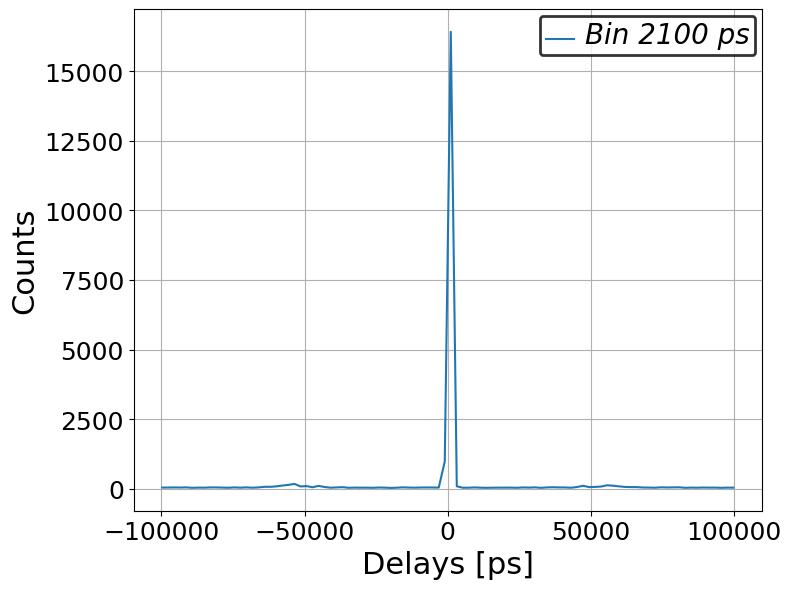

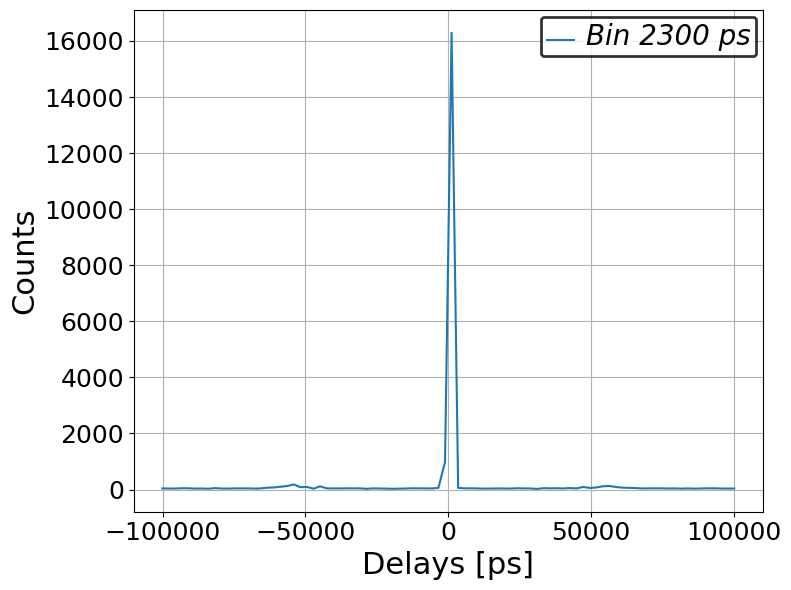

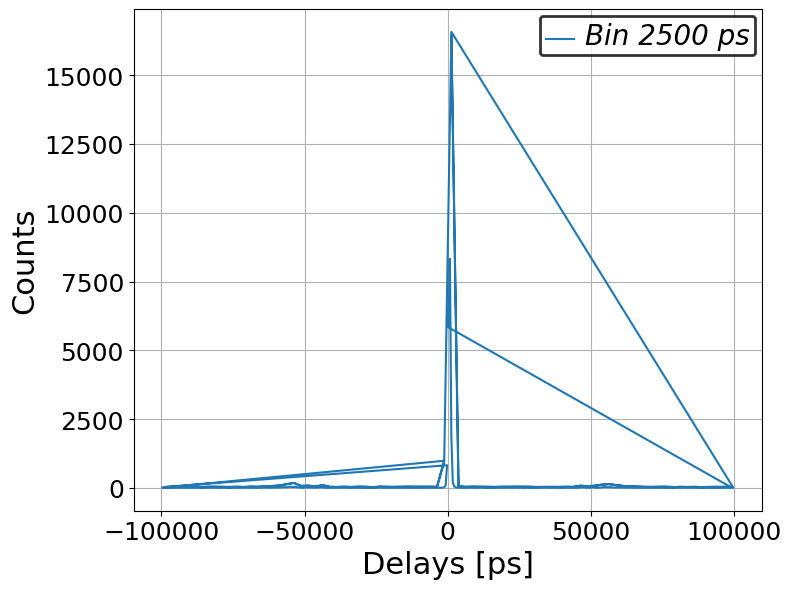

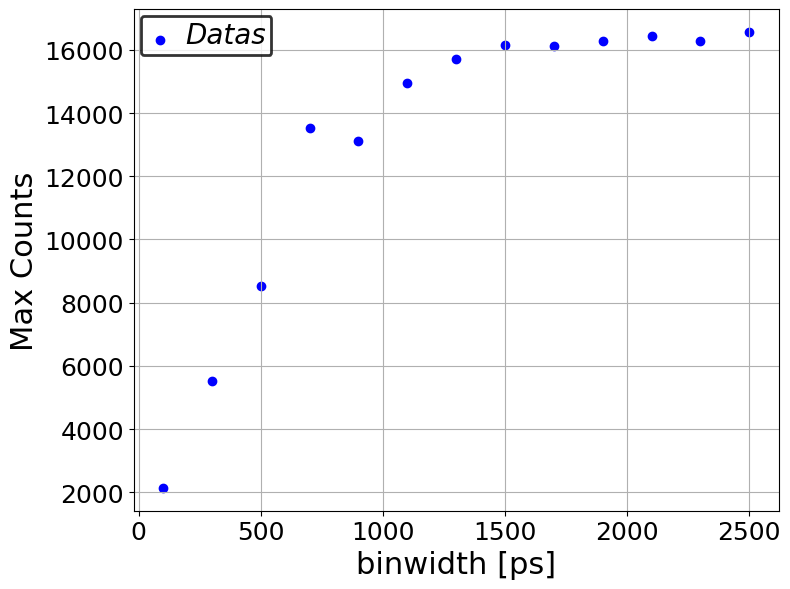

In [5]:
#plot the spectra for each bins
xlabel = "Delays [ps]"
ylabel = "Counts"


for i in range(len(bins)):
    ax,fig = u.create_figure_and_apply_format((8,6),xlabel=xlabel, ylabel=ylabel)
    ax.plot(datas[1][i],datas[2][i],label="Bin {} ps".format(datas[0][i]))
    
    u.set_legend_properties(ax)
    plt.show()


#plot the max of the counts for each binwidth
max_counts = np.zeros(len(bins))
for i in range(len(bins)):
    max_counts[i] = np.max(datas[2][i])

#plot the datas
xlabel = "binwidth [ps]"
ylabel = "Max Counts"

ax,fig = u.create_figure_and_apply_format((8,6),xlabel=xlabel, ylabel=ylabel)

ax.scatter(bins,max_counts,label="Datas",color="blue")

u.set_legend_properties(ax)
plt.show()





## Varying the threshold voltage for both


### Import the datas, process and plot the data

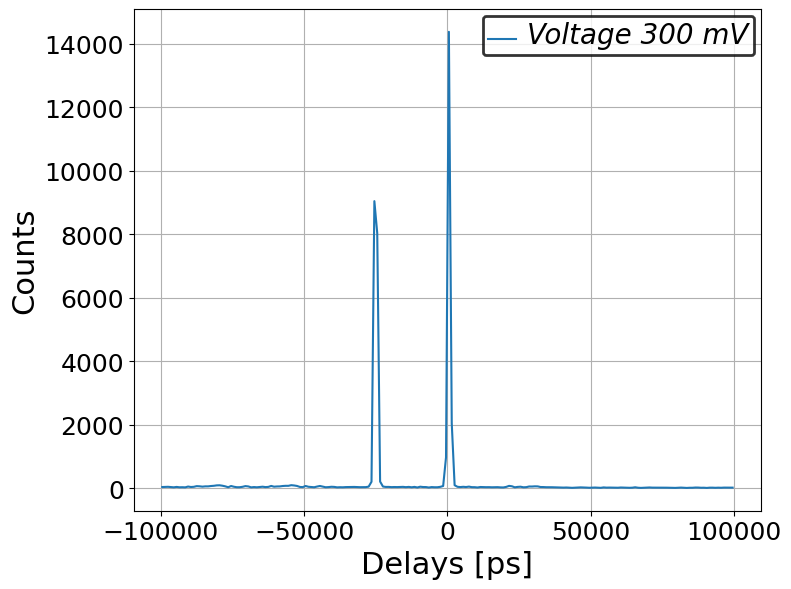

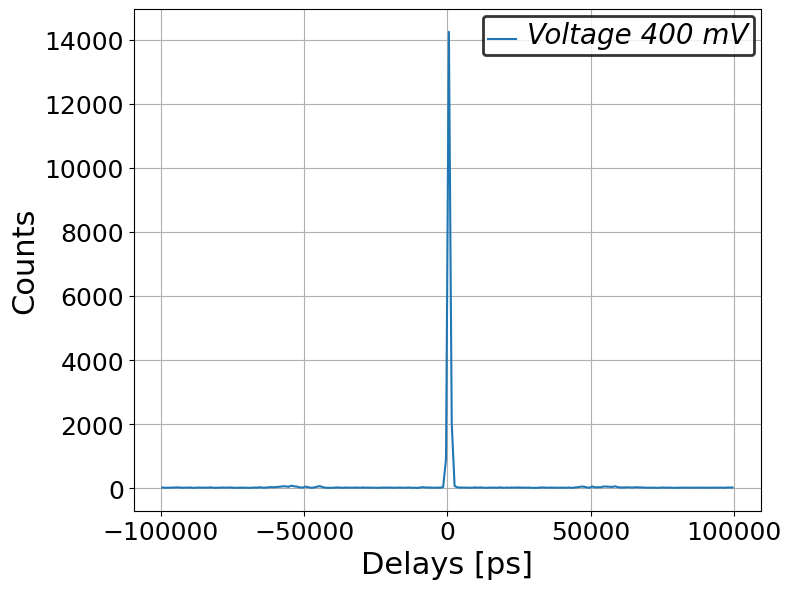

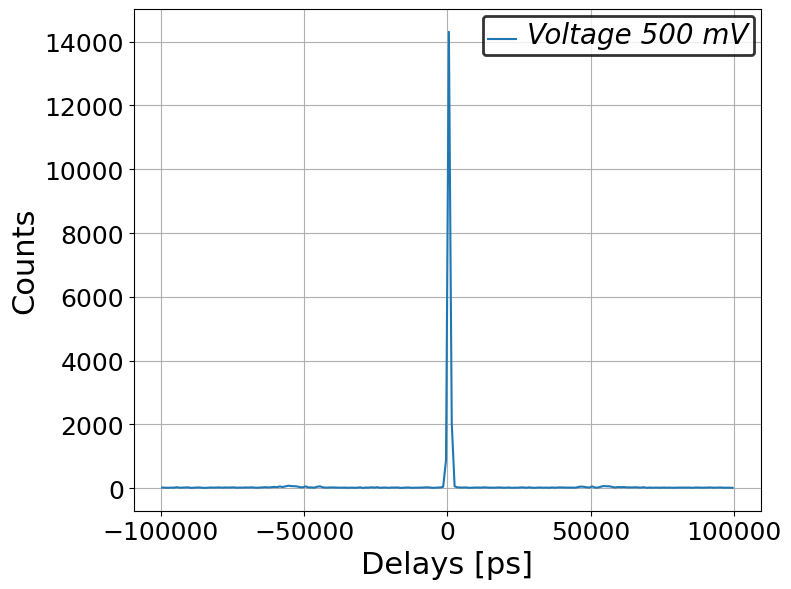

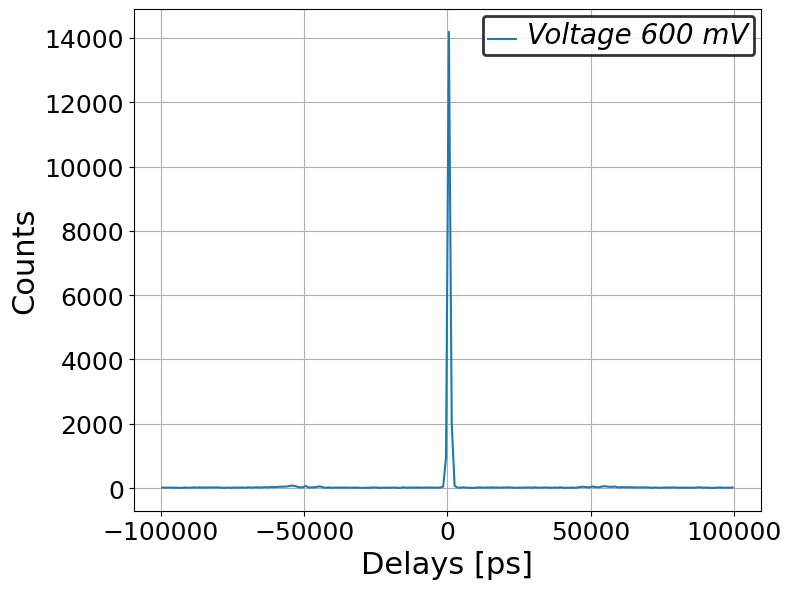

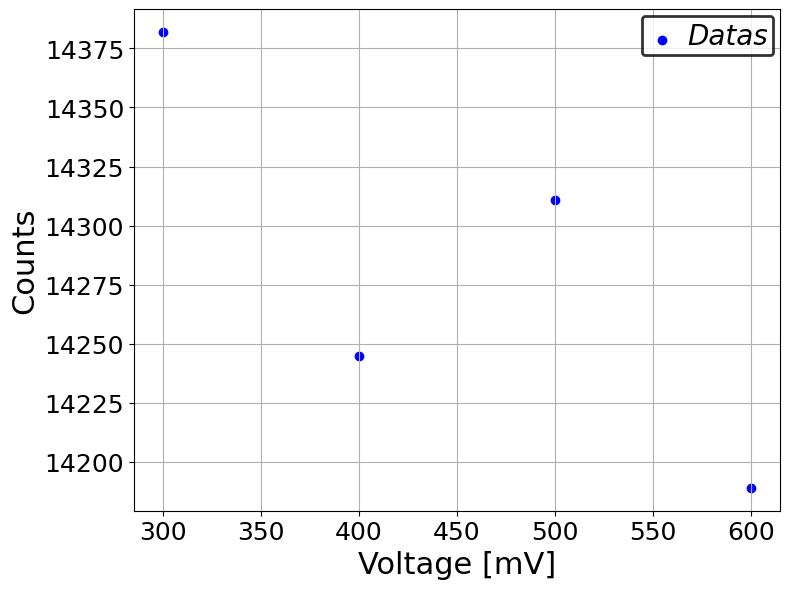

In [6]:
Voltages = np.array([300,400,500,600])

datas = [[],[],[]]

for voltage in Voltages :
    data = pd.read_csv("/workspaces/TP3/TP_Intrication-Quantique/Datas/Parameters/spectrum_bin1000ps_{}mV.csv".format(voltage), sep=";",header=0)
    
    delays = np.concatenate([-data.iloc[:,0].to_numpy()[::-1],data.iloc[:,0].to_numpy()])
    counts = np.concatenate([data.iloc[:,1].to_numpy()[::-1],data.iloc[:,2].to_numpy()])
    
    datas[0].append(voltage)
    datas[1].append(delays)
    datas[2].append(counts)
    
#plot the spectra for each voltage
xlabel = "Delays [ps]"
ylabel = "Counts"

for i in range(len(Voltages)):
    ax,fig = u.create_figure_and_apply_format((8,6),xlabel=xlabel, ylabel=ylabel)
    ax.plot(datas[1][i],datas[2][i],label="Voltage {} mV".format(datas[0][i]))
    
    u.set_legend_properties(ax)
    plt.show()
    
#plot the max of the counts for each voltage
max_counts = np.zeros(len(Voltages))
for i in range(len(Voltages)):
    max_counts[i] = np.max(datas[2][i])

#plot the datas
xlabel = "Voltage [mV]"
ylabel = "Counts"

ax,fig = u.create_figure_and_apply_format((8,6),xlabel=xlabel, ylabel=ylabel)

ax.scatter(Voltages,max_counts,label="Datas",color="blue")

u.set_legend_properties(ax)
plt.show()



## One 100mV and the other 500mV

### Import the datas, process and plot the data


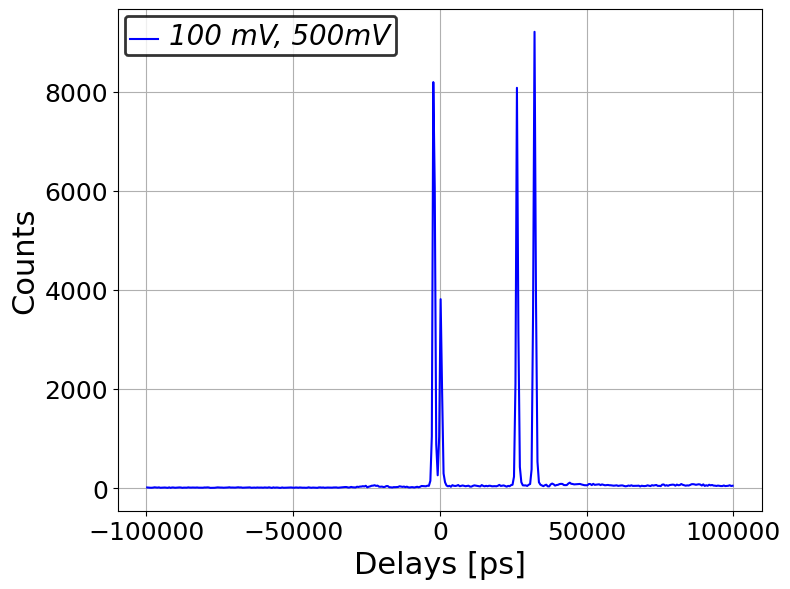

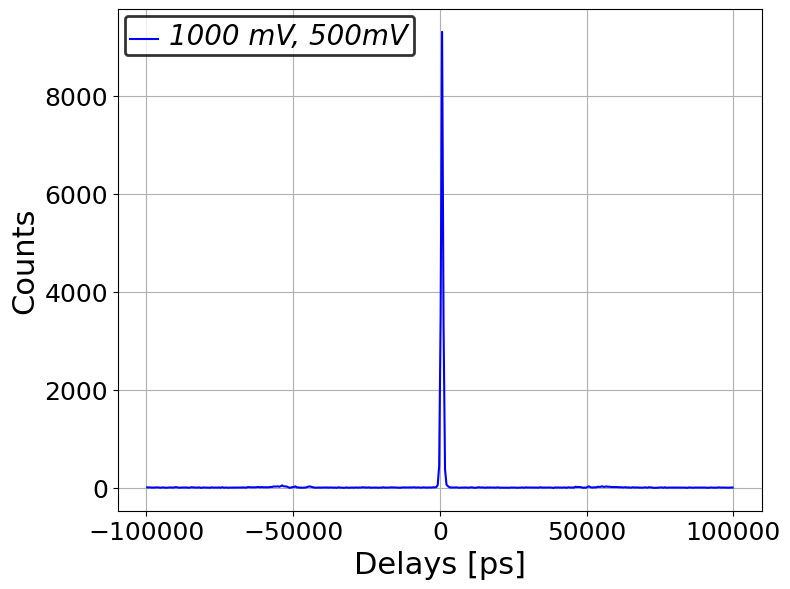

In [7]:
Voltages = np.array([100, 1000])

datas = [[],[],[]]

for voltage in Voltages:
    data = pd.read_csv("/workspaces/TP3/TP_Intrication-Quantique/Datas/Parameters/spectrum_bin500ps_{}_500mV.csv".format(voltage), sep=";",header=0)
    
    delays = np.concatenate([-data.iloc[:,0].to_numpy()[::-1],data.iloc[:,0].to_numpy()])
    counts = np.concatenate([data.iloc[:,1].to_numpy()[::-1],data.iloc[:,2].to_numpy()])
    
    datas[0].append(voltage)
    datas[1].append(delays)
    datas[2].append(counts)
    
#plot the spectra for each voltage
xlabel = "Delays [ps]"
ylabel = "Counts"

for i in range(len(Voltages)):
    ax,fig = u.create_figure_and_apply_format((8,6),xlabel=xlabel, ylabel=ylabel)
    ax.plot(datas[1][i],datas[2][i],label="{} mV, 500mV".format(datas[0][i]),color="blue")
    
    u.set_legend_properties(ax,loc="upper left")
    plt.show()
    